### __Import Libraries__

---

In [1]:
import pandas as pd
import numpy as np
import altair as alt

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### __Load Cleaned Dataset__

---

In [2]:
birdstrikes_clean = pd.read_csv('../data/birdstrikes_clean.csv')

### __Plot 1: Filled Area Plot__  

---

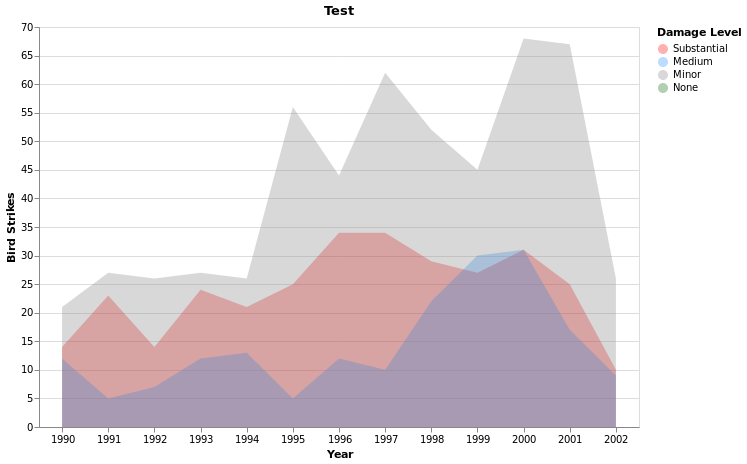

In [3]:
line_plot = alt.Chart(birdstrikes_clean.query('damage_level != "None"'),
                      title = "Test"
                      ).mark_area(opacity = 0.3
                      ).encode(
                            alt.X('year:O', axis=alt.Axis(title = "Year",
                                                          labelAngle = 0)),
                            alt.Y('count(damage_level):N', 
                                  axis = alt.Axis(title = "Bird Strikes"), 
                                  stack = None),
                            alt.Color('damage_level', 
                                      #sort = ['Substantial', 'Medium', 'Minor', 'None'],
                                      scale = alt.Scale(domain = ['Substantial', 'Medium', 'Minor', 'None'],
                                                        range = ['red', 'dodgerblue', 'grey', 'darkgreen']),
                                      legend = alt.Legend(title = "Damage Level")),
                                                          #orient = 'none', 
                                                          #legendX = 675, legendY = 10, 
                                                          #fillColor = 'white')),
                            alt.Order('damage_level_sort', sort = 'ascending')
                      ).properties(width = 600, height = 400)

line_plot

### __Plot 2: Stacked Bar Plot__  

---

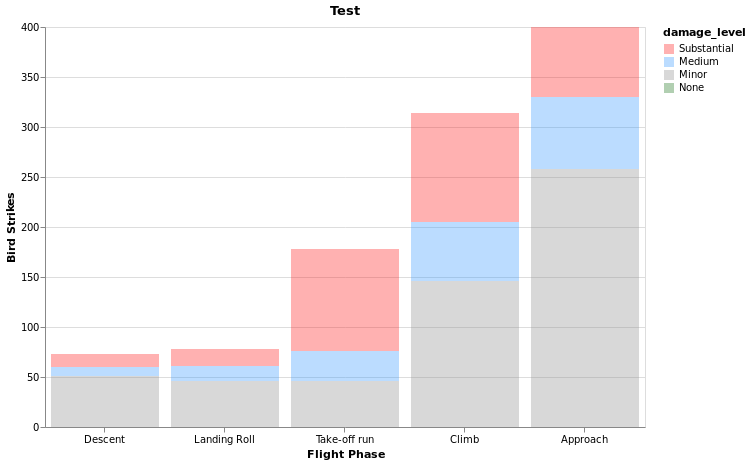

In [4]:
bar_plot = alt.Chart(birdstrikes_clean.query('damage_level != "None"'),
                    title = "Test"
                   ).mark_bar(opacity = 0.3
                   ).encode(
                        alt.X('flight_phase:O', 
                              axis=alt.Axis(title = "Flight Phase", 
                                            labelAngle = 0),
                              sort = alt.EncodingSortField(
                                  field = 'damage_level_sort',
                                  op = 'sum',
                                  order = 'ascending')),                                
                             #sort = ['Descent', 'Landing Roll', 'Take-off run', 'Climb', 'Approach']),
                        alt.Y('count(damage_level):Q', 
                              axis=alt.Axis(title = "Bird Strikes"), 
                              stack = True),
                        alt.Color('damage_level',
                                 #sort = ['Substantial', 'Medium', 'Minor', 'None'],
                                 scale = alt.Scale(domain = ['Substantial', 'Medium', 'Minor', 'None'],
                                                  range = ['red', 'dodgerblue', 'grey', 'darkgreen'])),
                        alt.Order('damage_level_sort', sort = 'ascending')
                        #alt.Tooltip(['count']) 
                   ).properties(width = 600, height = 400)
bar_plot

### __Plot 3: Heatmap__  

---

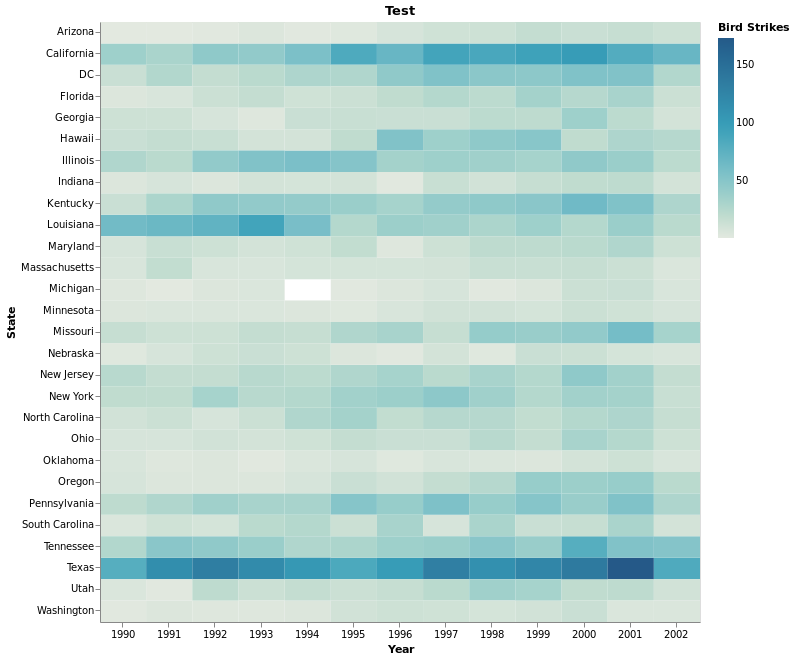

In [5]:
heatmap_plot = alt.Chart(birdstrikes_clean.query('state != "Colorado"',),
                         title = "Test"
                        ).mark_rect(
                        ).encode(
                                alt.X('year:N', axis = alt.Axis(title = "Year", 
                                                                labelAngle = 0)),
                                alt.Y('state:O', axis = alt.Axis(title = "State")),
                                alt.Color('count(damage_level)',
                                          scale = alt.Scale(scheme = "lighttealblue"),
                                          legend = alt.Legend(title = "Bird Strikes")),
                                alt.Tooltip(['year', 'state', 'count(damage_level)'])
                        ).properties(width = 600, height = 600)
heatmap_plot